<a href="https://colab.research.google.com/github/ManasviAtGitHub/Algorithms-for-Optimization/blob/main/Second_Order_Methods_(Newton%2C_Secant%2C_Quasi_Newton).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.6.0 on the current Colab Runtime...
2021-12-29 12:40:56 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Success! Please reload this page and jump to the next section.


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

## Newton's Method for univariate functions

f(x) = x^2,
f'(x) = 2x,
f''(x) = 2

In [1]:
function newtonsMethodForUnivariate(x_guess,max_iter)
    f_1 = 2*x_guess
    f_2 = 2
    converged = false
    iter=0
    while converged == false
        x_optimum = x_guess - (f_1/f_2)
        x_guess = x_optimum
        
        println("Iteration : $iter, Current Guess: $x_guess")
        
        if x_guess - 1 < 0.01
            converged = true
        end    
        if iter>max_iter
            converged = true 
        end
        iter = iter+1
    end     
end

newtonsMethodForUnivariate (generic function with 1 method)

In [2]:
newtonsMethodForUnivariate(3,100)

Iteration : 0, Current Guess: 0.0


In [3]:
function newtonsMethodForUnivariate_2(x_guess,max_iter)
    f_1 = 2*x_guess - 2
    f_2 = 2
    converged = false
    iter=0
    while converged == false
        x_optimum = x_guess - (f_1/f_2)
        x_guess = x_optimum
        
        println("Iteration : $iter, Current Guess: $x_guess")
        
        if x_guess - 1 < 0.01
            converged = true
        end    
        if iter>max_iter
            converged = true 
        end
        iter = iter+1
    end     
end

newtonsMethodForUnivariate_2 (generic function with 1 method)

In [4]:
newtonsMethodForUnivariate_2(10,100)

Iteration : 0, Current Guess: 1.0


## Newton's Method for Multivariate functions

### Gradient and Hessian Computation for the function
f(x,y) = x^2 + y^2 - 2x - 2y + 6

p_x = 2x - 2

p_y = 2y - 2

p_x_x = 2

p_x_y = 0

p_y_x = 0

p_y_y = 2

grad_f = [2x-2, 2y-2]

hessian_f = [2 0; 0 2]

### Some matrix algebra

In [5]:
hess = [2 0; 0 2]

2×2 Matrix{Int64}:
 2  0
 0  2

In [6]:
h_inv= inv(hess)

2×2 Matrix{Float64}:
 0.5  0.0
 0.0  0.5

In [7]:
vec1 = [3,4]

2-element Vector{Int64}:
 3
 4

In [8]:
vec1'

1×2 adjoint(::Vector{Int64}) with eltype Int64:
 3  4

In [9]:
vec2=(h_inv * vec1)

2-element Vector{Float64}:
 1.5
 2.0

In [10]:
vec3 = [1, 2]

2-element Vector{Int64}:
 1
 2

In [11]:
vec4 = vec3 - vec2

2-element Vector{Float64}:
 -0.5
  0.0

In [12]:
function newtonsMethodForMultivariate(x_guess,y_guess,max_iter)
    p_x = 2*x_guess-2
    p_y = 2*y_guess-2

    # just for illustration purpose we write down the 2nd order derivatives
    p_x_x = 2
    p_x_y = 0
    p_y_x = 0
    p_y_y = 2
    
    gradient = [p_x, p_y]
    hessian = [p_x_x p_x_y;
                p_y_x p_y_y]
    
    
    guess_vector = [x_guess, y_guess]
    
    
    converged = false
    iter=0

    while converged ==false
         
        x_optimum = (guess_vector - (inv(hessian) * gradient))
    
        guess_vector = x_optimum
        
        
        println("Iteration : $iter, Current Guess: $guess_vector")
       
        if guess_vector[1] - 1 < 0.01 && guess_vector[2] - 1 < 0.01
            converged = true
        end             
        if iter>max_iter
            converged = true 
        end
        iter = iter+1
    end
end

newtonsMethodForMultivariate (generic function with 1 method)

In [13]:
newtonsMethodForMultivariate(30,40,100)

Iteration : 0, Current Guess: [1.0, 1.0]


### Booth's Function

f(x,y) = (x + 2y -7)^2 + (2x + y -5)^2

p_x = 10x + 8y - 34

p_y = 8x + 10y - 38

p_x_x = 10

p_x_y = 8

p_y_x = 10

p_y_y = 8

In [14]:
function newtonsMethodForMultivariate_2(x,y,max_iter)
    p_x = ((10*x) + (8*y) - 34)
    p_y = ((8*x) + (10*y) - 38)

    # just for illustration purpose we write down the 2nd order derivatives
    p_x_x = 10
    p_x_y = 8
    p_y_x = 8
    p_y_y = 10
    
    gradient = [p_x, p_y]
    hessian = [p_x_x p_x_y;
                p_y_x p_y_y]
    
    
    guess_vector = [x, y]
    
    
    converged = false
    iter=0
    
    while converged ==false
        println("Current guess: $guess_vector, grad: $gradient, hess : $hessian")
        x_optimum = (guess_vector - (inv(hessian) * (gradient)))
        
        guess_vector = x_optimum
        
        
        println("Iteration : $iter, Current Guess: $guess_vector")
        
        #Recompute Gradients and Hessians
        x = guess_vector[1]
        y = guess_vector[2]
        
        p_x = ((10*x) + (8*y) - 34)
        p_y = ((8*x) + (10*y) - 38)
        
        gradient = [p_x, p_y]
        
        if guess_vector[1] - 1 < 0.01 && guess_vector[2] - 3 < 0.01
            converged = true
        end                     
        if iter>max_iter
            converged = true 
        end
        iter = iter+1
    end
end

newtonsMethodForMultivariate_2 (generic function with 1 method)

In [15]:
newtonsMethodForMultivariate_2(90,80,100)

Current guess: [90, 80], grad: [1506, 1482], hess : [10 8; 8 10]
Iteration : 0, Current Guess: [1.0, 3.0]


## Secant Method


In [16]:
function secant_method(curr_x,max_iter)
    
    curr_fd = 2*curr_x
    prev_x = 0
    prev_fd = 0
    
    converged = false
    iter=0
    while converged == false
        
        
        c_x = curr_x - prev_x
        c_fd = curr_fd - prev_fd

        prev_x = curr_x
        prev_fd = curr_fd
        
        
        curr_x = curr_x - (c_x/c_fd)*curr_fd
        curr_fd = 2*curr_x
        
        
        println("Iteration : $iter, Current Guess: $curr_x")
        
        if curr_x - 1 < 0.01
            converged = true
        end
        
        if iter > max_iter
            converged = true 
        end
        iter = iter+1
    end
end


secant_method (generic function with 1 method)

In [17]:
secant_method(5,100)

Iteration : 0, Current Guess: 0.0


## Using Himmelblau function

In [20]:
using Plots

In [21]:
himmelblau2(x) = (x[1]^2 + x[2] - 11)^2 + (x[1] + x[2]^2 - 7)^2

himmelblau2 (generic function with 1 method)

In [22]:
himmelblau(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2

himmelblau (generic function with 1 method)

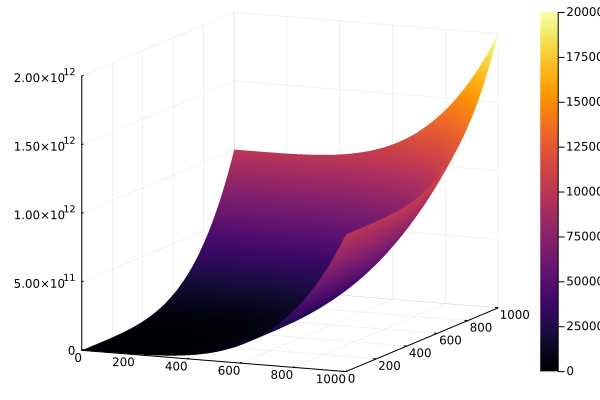

In [23]:
surface(0:1:1000, 0:1:1000, himmelblau)

***Global Minimum***

In [24]:
himmelblau(3.0,2.0)

0.0

***Local Minimums***

In [27]:
himmelblau(-2.805118,3.131312)

1.0989296656869089e-11

In [28]:
himmelblau(-3.779310, -3.283186)

3.797861082863832e-12

In [29]:
himmelblau(3.584458,-1.848126)

4.6202475179237533e-8

In [30]:
function newtonsMethodWithHimmelblau(x,y,max_iter)
    
    p_x = 4 * x * ((x^2) + y - 11) + 2 * (x + (y^2) - 7)
    p_y = 4 * y * ((y^2) + x - 7) + 2 * (y+ (x^2) - 11)

    # just for illustration purpose we write down the 2nd order derivatives
    p_x_x = 12 * (x^2) + 4 * y - 42
    p_x_y = 4 * y + 4 * x
    p_y_x = 4 * x + 4 * y
    p_y_y = 12 * (y^2) + 4 * x - 26
    
    gradient = [p_x, p_y]
    hessian = [p_x_x p_x_y;
                p_y_x p_y_y]
    
    
    guess_vector = [x, y]
    
    
    converged = false
    iter=0
    
    while converged ==false
        #println("Current guess: $guess_vector, grad: $gradient, hess : $hessian")
        
        x_optimum = (guess_vector - (inv(hessian) * (gradient)))
        
        guess_vector = x_optimum
        
        
        println("Iteration : $iter, Current Guess: $guess_vector")
        
        x = guess_vector[1]
        y = guess_vector[2]
        
        p_x = 4 * x * ((x^2) + y - 11) + 2 * (x + (y^2) - 7)
        p_y = 4 * y * ((y^2) + x - 7) + 2 * (y+ (x^2) - 11)
        p_x_x = 12 * (x^2) + 4 * y - 42
        p_x_y = 4 * y + 4 * x
        p_y_x = 4 * x + 4 * y
        p_y_y = 12 * (y^2) + 4 * x - 26
        
        
        gradient = [p_x, p_y]
        hessian = [p_x_x p_x_y; p_y_x p_y_y]
        
        cost = himmelblau(x,y)
        
        println("Current himmelblau function value : $cost")
        if cost < 1e-3
            converged = true
        end                     
        if iter>max_iter
            converged = true 
        end
        iter = iter+1
    end
end

newtonsMethodWithHimmelblau (generic function with 1 method)

In [31]:
newtonsMethodWithHimmelblau(3.01,2.01,1000)

Iteration : 0, Current Guess: [3.0000389708914414, 2.000064466603127]
Current himmelblau function value : 1.7709384685843918e-7


In [32]:
newtonsMethodWithHimmelblau(5,-4,100)

Iteration : 0, Current Guess: [4.039381278335852, -2.8825673393190505]
Current himmelblau function value : 34.53178289521665
Iteration : 1, Current Guess: [3.666575608281751, -2.231305369914019]
Current himmelblau function value : 2.7521537242190894
Iteration : 2, Current Guess: [3.5927705762106767, -1.9279973924412994]
Current himmelblau function value : 0.09646548556533514
Iteration : 3, Current Guess: [3.584842379040596, -1.85270052791994]
Current himmelblau function value : 0.00030331006142288197


In [33]:
newtonsMethodWithHimmelblau(3.5,2.5,100)

Iteration : 0, Current Guess: [3.078047683310841, 2.1051881841355526]
Current himmelblau function value : 0.5958587210905233
Iteration : 1, Current Guess: [3.0015908968587066, 2.0072643408401336]
Current himmelblau function value : 0.0012252051453945567
Iteration : 2, Current Guess: [2.999991556534955, 2.0000433704011917]
Current himmelblau function value : 2.7291357170345963e-8


In [34]:
newtonsMethodWithHimmelblau(3.0,2.0,1000)

Iteration : 0, Current Guess: [3.0, 2.0]
Current himmelblau function value : 0.0


### What happens when we don't updates gradients and hessians

In [35]:
#Here we do not update gradients and hessians

function newtonWithHimmelblau_NotOptimized(x,y,max_iter)
    
    p_x = 4 * x * ((x^2) + y - 11) + 2 * (x + (y^2) - 7)
    p_y = 4 * y * ((y^2) + x - 7) + 2 * (y+ (x^2) - 11)

    # just for illustration purpose we write down the 2nd order derivatives
    p_x_x = 12 * (x^2) + 4 * y - 42
    p_x_y = 4 * y + 4 * x
    p_y_x = 4 * x + 4 * y
    p_y_y = 12 * (y^2) + 4 * x - 26
    
    gradient = [p_x, p_y]
    hessian = [p_x_x p_x_y;
                p_y_x p_y_y]
    

    
    
    guess_vector = [x, y]
    
    
    converged = false
    iter=0
    
    while converged ==false
        println("Current guess: $guess_vector, grad: $gradient, hess : $hessian")
        x_optimum = (guess_vector - (inv(hessian) * (gradient)))
        
       
        guess_vector = x_optimum
        
        
        println("Iteration : $iter, Current Guess: $guess_vector")
       
        cost = himmelblau(guess_vector[1], guess_vector[2])
        println("Current himmelblau function value : $cost")
       
        
        if cost < 1e-3
            converged = true
        end                     
        if iter>max_iter
            converged = true 
        end
        iter = iter+1
    end
end

newtonWithHimmelblau_NotOptimized (generic function with 1 method)

In [36]:
newtonWithHimmelblau_NotOptimized(3.01,2.01,100)

Current guess: [3.01, 2.01], grad: [0.9442039999999766, 0.543003999999986], hess : [74.76119999999997 20.08; 20.08 34.521199999999986]
Iteration : 0, Current Guess: [3.0000389708914414, 2.000064466603127]
Current himmelblau function value : 1.7709384685843918e-7


In [39]:
]add LinearAlgebra

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [37e2e46d] + LinearAlgebra
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [40]:
using LinearAlgebra

In [41]:
function _line_search(f, x, d)
    d = normalize(d)
    objective = α -> f(x + α*d)
    v, α = f(x), 1e-6
    while f(x + α*d) < v
        v = f(x + α*d)
        α += 1e-6
    end
    return x + α*d
end

_line_search (generic function with 1 method)

## DFP Method

In [37]:
function dfp_method(x,y,max_iter)

    
    prev_gradient = [0, 0]
    prev_hessian = [0 0; 0 0]
    prev_guess_vector = [0, 0]
    Q=[1 0; 0 1]
    
    p_x = 4 * x * ((x^2) + y - 11) + 2 * (x + (y^2) - 7)
    p_y = 4 * y * ((y^2) + x - 7) + 2 * (y+ (x^2) - 11)
    
    curr_gradient = [p_x, p_y]
    curr_guess_vector = [x, y]
    
    converged = false
    iter=0
    
    while converged ==false
        
        println("Current Gradient: $curr_gradient")
        #println("hess : $Q")
        
        optimum_vector = _line_search(himmelblau2, curr_guess_vector, -Q*curr_gradient)

        prev_guess_vector = curr_guess_vector
        curr_guess_vector = optimum_vector
        
        x = curr_guess_vector[1]
        y = curr_guess_vector[2]
        
        
        p_x = 4 * x * ((x^2) + y - 11) + 2 * (x + (y^2) - 7)
        p_y = 4 * y * ((y^2) + x - 7) + 2 * (y+ (x^2) - 11)

        prev_gradient = curr_gradient
        curr_gradient = [p_x, p_y]
        
        delta = curr_guess_vector - prev_guess_vector
        gamma = curr_gradient - prev_gradient
        
        
       
        δ = delta
        γ = gamma
        
        Q = Q - Q*γ*γ'*Q/(γ'*Q*γ) + δ*δ'/(δ'*γ)
       
        
        println("Iteration : $iter")
        println("Current Guess: $curr_guess_vector")
        println("Previous Guess: $prev_guess_vector")
        
        cost = himmelblau2(curr_guess_vector)
        println("Current himmelblau function value : $cost")
       
        if cost < 1e-9
            converged = true
        end                     
        if iter>max_iter
            converged = true 
        end
        iter = iter+1
    end    
    

end

dfp_method (generic function with 1 method)

In [42]:
dfp_method(3.5,2.5,30)

Current Gradient: [58.0, 35.0]
Iteration : 0
Current Guess: [2.922486011234583, 2.151500179193283]
Previous Guess: [3.5, 2.5]
Current himmelblau function value : 0.39868759301407564
Current Gradient: [-2.4926603905023432, 4.130534037369193]
Iteration : 1
Current Guess: [2.9998530944571904, 1.999889564348289]
Previous Guess: [2.922486011234583, 2.151500179193283]
Current himmelblau function value : 1.330253406628706e-6
Current Gradient: [-0.013078857003732958, -0.006692522258048494]
Iteration : 2
Current Guess: [3.0000088326905963, 1.99998374291621]
Previous Guess: [2.9998530944571904, 1.999889564348289]
Current himmelblau function value : 4.50768501043828e-9
Current Gradient: [0.0003284801911385717, -0.00037608111226546017]
Iteration : 3
Current Guess: [2.9999996734250454, 2.000000389473048]
Previous Guess: [3.0000088326905963, 1.99998374291621]
Current himmelblau function value : 3.9809689551575236e-12


## BFGS Method

In [43]:
function bfgs_method(x,y,max_iter)

    
    prev_gradient = [0, 0]
    prev_guess_vector = [0, 0]
    
    Q=[1 0; 0 1]
    
    p_x = 4 * x * ((x^2) + y - 11) + 2 * (x + (y^2) - 7)
    p_y = 4 * y * ((y^2) + x - 7) + 2 * (y+ (x^2) - 11)
    
    curr_gradient = [p_x, p_y]
    curr_guess_vector = [x, y]
    
    converged = false
    iter=0
    
    while converged ==false
        
        println("Current Gradient: $curr_gradient")
        #println("hess : $Q")
        
        optimum_vector = _line_search(himmelblau2, curr_guess_vector, -Q*curr_gradient)

        prev_guess_vector = curr_guess_vector
        curr_guess_vector = optimum_vector
        
        x = curr_guess_vector[1]
        y = curr_guess_vector[2]
        
        
        p_x = 4 * x * ((x^2) + y - 11) + 2 * (x + (y^2) - 7)
        p_y = 4 * y * ((y^2) + x - 7) + 2 * (y+ (x^2) - 11)

        prev_gradient = curr_gradient
        curr_gradient = [p_x, p_y]
        
        delta = curr_guess_vector - prev_guess_vector
        gamma = curr_gradient - prev_gradient
        
        
       
        δ = delta
        γ = gamma
        
        Q = Q - (δ*γ'*Q + Q*γ*δ')/(δ'*γ) +(1 + (γ'*Q*γ)/(δ'*γ))*(δ*δ')/(δ'*γ)
       
        
        println("Iteration : $iter")
        println("Current Guess: $curr_guess_vector")
        println("Previous Guess: $prev_guess_vector")
        
        cost = himmelblau2(curr_guess_vector)
        println("Current himmelblau function value : $cost")
       
        if cost < 1e-9

            converged = true
        end                     
        if iter>max_iter
            converged = true 
        end
        iter = iter+1
    end    
    

end

bfgs_method (generic function with 1 method)

In [44]:
bfgs_method(3.5,2.5,10)

Current Gradient: [58.0, 35.0]
Iteration : 0
Current Guess: [2.922486011234583, 2.151500179193283]
Previous Guess: [3.5, 2.5]
Current himmelblau function value : 0.39868759301407564
Current Gradient: [-2.4926603905023432, 4.130534037369193]
Iteration : 1
Current Guess: [2.9998530943263937, 1.9998895642815433]
Previous Guess: [2.922486011234583, 2.151500179193283]
Current himmelblau function value : 1.330255563994759e-6
Current Gradient: [-0.013078868016074573, -0.006692527142803518]
Iteration : 2
Current Guess: [3.0000088325749843, 1.9999837428243539]
Previous Guess: [2.9998530943263937, 1.9998895642815433]
Current himmelblau function value : 4.507681580343393e-9
Current Gradient: [0.00032846979864603745, -0.0003760865475491386]
Iteration : 3
Current Guess: [2.99999967745733, 2.0000003916627738]
Previous Guess: [3.0000088325749843, 1.9999837428243539]
Current himmelblau function value : 3.930485941792099e-12


In [45]:
]add Optim

   Resolving package versions...
   Installed OpenSpecFun_jll ──────── v0.5.5+0
   Installed IfElse ───────────────── v0.1.1
   Installed PositiveFactorizations ─ v0.2.4
   Installed Static ───────────────── v0.4.1
   Installed ArrayInterface ───────── v3.2.1
   Installed DiffRules ────────────── v1.9.0
   Installed FillArrays ───────────── v0.12.7
   Installed FiniteDiff ───────────── v2.8.1
   Installed SpecialFunctions ─────── v2.0.0
   Installed Parameters ───────────── v0.12.3
   Installed ForwardDiff ──────────── v0.10.24
   Installed NLSolversBase ────────── v7.8.2
   Installed LineSearches ─────────── v7.1.1
   Installed Optim ────────────────── v1.6.0
   Installed CommonSubexpressions ─── v0.3.0
   Installed DiffResults ──────────── v1.0.3
   Installed UnPack ───────────────── v1.0.2
    Updating `~/.julia/environments/v1.6/Project.toml`
  [429524aa] + Optim v1.6.0
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [4fba245c] + ArrayInterface v3.2.1
  [bbf7d656] + Commo

In [46]:
using Optim

In [47]:
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2

f (generic function with 1 method)

In [48]:
x0 = [0.0, 0.0]
optimize(f, x0)

 * Status: success

 * Candidate solution
    Final objective value:     3.525527e-09

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    60
    f(x) calls:    117


In [49]:
optimize(f, x0, LBFGS())

 * Status: success

 * Candidate solution
    Final objective value:     5.378388e-17

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 4.54e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.54e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.85e-19 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.30e-03 ≰ 0.0e+00
    |g(x)|                 = 9.88e-14 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    24
    f(x) calls:    67
    ∇f(x) calls:   67


In [50]:
himmelblau2(x) = (x[1]^2 + x[2] - 11)^2 + (x[1] + x[2]^2 - 7)^2

himmelblau2 (generic function with 1 method)

In [51]:
x0 = [3.01, 2.01]
optimize(himmelblau2, x0)

 * Status: success

 * Candidate solution
    Final objective value:     1.416409e-09

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    36
    f(x) calls:    72


In [52]:
optimize(himmelblau2, x0, LBFGS())

 * Status: success

 * Candidate solution
    Final objective value:     1.061505e-19

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 5.41e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.80e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 4.16e-18 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.92e+01 ≰ 0.0e+00
    |g(x)|                 = 3.38e-14 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    5
    f(x) calls:    14
    ∇f(x) calls:   14


In [53]:
optimize(himmelblau2, x0, BFGS())

 * Status: success

 * Candidate solution
    Final objective value:     1.067925e-19

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.19e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.30e-09 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.53e-14 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.36e+05 ≰ 0.0e+00
    |g(x)|                 = 2.57e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    5
    f(x) calls:    11
    ∇f(x) calls:   11
